In [2]:
import numpy as np
import pylab as plt

In [3]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

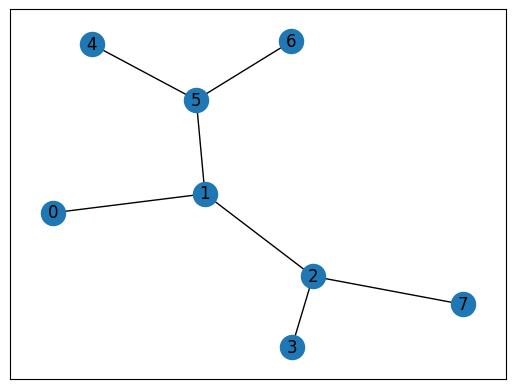

In [7]:
goal = 7
epsilon = 0.1

import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()


In [15]:
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [16]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [17]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    #print(current_state_row)
    #print(current_state_row.shape)
    #print(np.where(current_state_row >= 0))
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)
available_act

array([0, 2, 5])

In [19]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)
action

2

In [22]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    print(max_index, max_index.shape)
    if max_index.shape[0] > 1:
          max_index = int(np.random.choice(max_index, size = 1))
    else:
          max_index = int(max_index)
    max_value = Q[action, max_index]
    
    r = R[current_state, action]
    Q[current_state, action] = r + gamma * max_value
    #print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state, action, gamma)
Q

[0 1 2 3 4 5 6 7] (8,)


matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

Trained Q matrix:
[[  0.          63.99863962   0.           0.           0.
    0.           0.           0.        ]
 [ 51.1989117   -0.20000446  80.          -0.20000446   0.
   51.19050776   0.           0.        ]
 [  0.          63.99863962   0.          63.99863962   0.
    0.           0.         100.        ]
 [  0.           0.          80.           0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   51.19050776   0.           0.        ]
 [  0.          63.9881347    0.           0.          40.95240621
    0.          40.95240621   0.        ]
 [  0.           0.           0.           0.           0.
   51.19050776   0.           0.        ]
 [  0.           0.          79.99955398   0.           0.
    0.           0.         100.        ]]


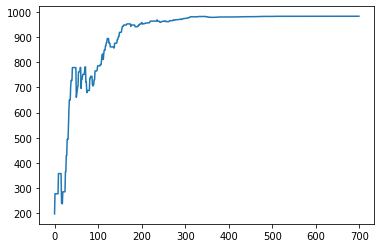

In [17]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    #print ('Score:', str(score))

print("Trained Q matrix:")
print(Q/np.max(Q)*100)


plt.plot(scores)
plt.show()

In [21]:
# Testing
current_state = 4
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    print(np.where(Q[current_state,] == np.max(Q[current_state,])))
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)

    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)


(array([0]), array([5]))
(array([0]), array([1]))
(array([0]), array([2]))
(array([0]), array([7]))
Most efficient path:
[4, 5, 1, 2, 7]


In [59]:
b = np.matrix(np.random.rand(4,2))
print(b[0,])
print(b[0].shape)
print(np.array(b[0]).flatten())

[[0.80107874 0.15827025]]
(1, 2)
[0.80107874 0.15827025]


In [28]:
b = np.matrix(np.random.rand(4,2))
np.array(b).flatten()

array([0.95115159, 0.59349644, 0.70589763, 0.22612816, 0.85712217,
       0.08855112, 0.65403397, 0.35518365])